In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from config import username, password, host, port
from sqlalchemy import create_engine

In [2]:
# Connect the postgresql to Pandas
engine = create_engine(f"postgresql://{username}:{password}@{host}:{port}/employees_db")
con = engine.connect()

In [3]:
engine.table_names()

['titles', 'employees', 'departments', 'dept_manager', 'dept_emp', 'salaries']

In [4]:
# Store the salaries table to a data frame
salaries_df = pd.read_sql("SELECT * FROM salaries", con)
salaries_df

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [5]:
# Store the employees table to a data frame
employees_df = pd.read_sql("SELECT emp_no, emp_title_id FROM employees", con)
employees_df

,emp_no,emp_title_id
0,473302,s0001
1,475053,e0002
2,57444,e0002
3,421786,s0001
4,282238,e0003
...,...,...
300019,464231,s0001
300020,255832,e0002
300021,76671,s0001
300022,264920,s0001


In [6]:
# Join the columns with `pd.merge()` on the 'emp_no' column.
joined_df = pd.merge(salaries_df, employees_df, on="emp_no")
joined_df

,emp_no,salary,emp_title_id
0,10001,60117,e0003
1,10002,65828,s0001
2,10003,40006,e0003
3,10004,40054,e0003
4,10005,78228,s0001
...,...,...,...
300019,499995,40000,e0002
300020,499996,58058,e0003
300021,499997,49597,e0003
300022,499998,40000,s0001


In [7]:
# Create the bins in which salaries Data will be held
salaries_to_cut = [40000, 60000, 80000, 120000, 140000]
# Create the names for the bins
salaries_group_name = ['40,000 - 60,000', '60,000 - 80,000', '80,000 - 120,000', '120,000 - 140,000']

# Create rating groups using the dataset with non-duplicate players
salaries_groups = pd.cut(
    x=joined_df['salary'],
    bins=salaries_to_cut,
    labels=salaries_group_name,
    include_lowest=True,
)


# Create data frame to show most common salary ranges

salary_counts = joined_df.groupby(salaries_groups)['emp_no'].count()

salary_range_counts = {
    'Salary Count': salary_counts
}

salary_range_counts = pd.DataFrame(salary_range_counts)
salary_range_counts

,Salary Count
salary,
"40,000 - 60,000",216389
"60,000 - 80,000",66219
"80,000 - 120,000",17392
"120,000 - 140,000",24


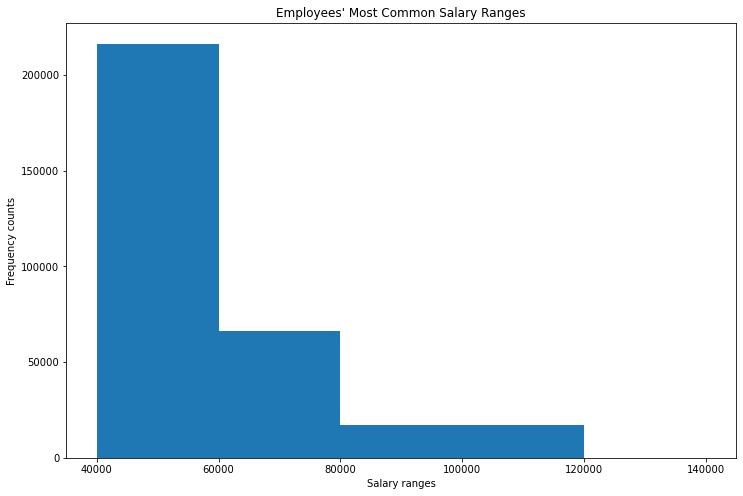

In [8]:
# Also, plot a histogram to visualize the most common salary ranges for employees
plt.subplots(figsize=(12,8))
plt.hist(joined_df['salary'], bins=[40000, 60000, 80000, 120000, 140000])
plt.xlabel('Salary ranges')
plt.ylabel('Frequency counts')
plt.title("Employees' Most Common Salary Ranges")
plt.show()

## Based on the data frame and the histogram above, we can see that the most common salary range is the $40,000 - 60,000 range.

## In the process below, an analysis of average salary by title is to be done.

In [10]:
title_df = pd.read_sql("SELECT * FROM titles", con)
title_df.columns = ['emp_title_id', 'title']
title_df

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [12]:
merged_df = pd.merge(title_df, joined_df, on='emp_title_id')
merged_df

,emp_title_id,title,emp_no,salary
0,s0001,Staff,10002,65828
1,s0001,Staff,10005,78228
2,s0001,Staff,10007,56724
3,s0001,Staff,10011,42365
4,s0001,Staff,10016,70889
...,...,...,...,...
300019,m0001,Manager,111534,48077
300020,m0001,Manager,111692,40000
300021,m0001,Manager,111784,40000
300022,m0001,Manager,111877,53846


In [21]:
salary_by_title = pd.DataFrame(round(merged_df.groupby('title')['salary'].mean(),))
salary_by_title.columns = ['avg_salary']
salary_by_title

,avg_salary
title,
Assistant Engineer,48564.0
Engineer,48535.0
Manager,51531.0
Senior Engineer,48507.0
Senior Staff,58550.0
Staff,58465.0
Technique Leader,48583.0


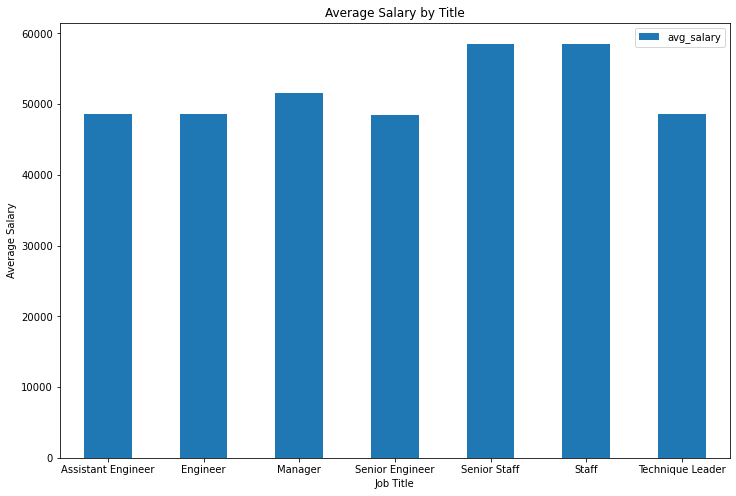

In [25]:
salary_by_title.plot(kind='bar',
                     figsize=(12,8),
                     xlabel='Job Title',
                     ylabel='Average Salary',
                     title='Average Salary by Title')
plt.xticks(rotation='horizontal')
plt.show()

## Epilogue --> Look for my employee ID... I have the lowest salary...

In [26]:
merged_df.loc[merged_df['emp_no']==499942]

,emp_title_id,title,emp_no,salary
299999,e0004,Technique Leader,499942,40000
